In [2]:
import numpy as np
from torch.utils.data import Dataset, DataLoader
from dataloader import MyDataset, ToTensor
from torchvision import transforms, utils
import matplotlib.pyplot as plt
from cnnNet import Net
import torch

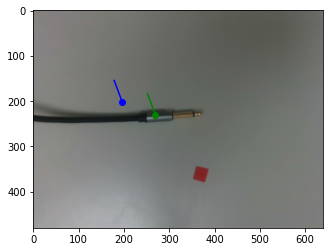

In [4]:
train_dataset = MyDataset(csv_file='data/train_labels.csv',
                                root_dir='data/',
                                transform=transforms.Compose([
                                    ToTensor()
                                ]))

validation_dataset = MyDataset(csv_file='data/validation_labels.csv',
                                root_dir='data/',
                                transform=transforms.Compose([
                                    ToTensor()
                                ]))

train_dataloader = DataLoader(train_dataset, batch_size=4,
                        shuffle=True, num_workers=0)

validation_dataloader = DataLoader(validation_dataset, batch_size=1,
                        shuffle=True, num_workers=0)

model = Net()
model.load_state_dict(torch.load('model/best.pth'))
model.eval()
for i, data in enumerate(validation_dataloader, 0):
    inputs, labels = data['image'], data['labels']
    predict = model(inputs)[0]
    predict = predict.detach().numpy()
    labels = labels.numpy()[0]
    inputs = inputs.numpy()[0]

    # show image
    plt.imshow(inputs.transpose(1, 2, 0).astype(np.uint8))
    # show ground truth location and prediction
    plt.scatter(predict[0] * 6.4, predict[1] * 4.8, c = 'blue')
    plt.scatter(labels[0] * 6.4, labels[1] * 4.8, c = 'green')

    # show rotation
    x = predict[0] * 6.4
    y = predict[1] * 4.8
    theta = predict[2] / 180 * np.pi
    length = 50
    rotation_prediction = plt.plot([x, x + length * np.sin(theta)], [y, y - length * np.cos(theta)], c = 'blue')

    x = labels[0] * 6.4
    y = labels[1] * 4.8
    theta = predict[2] / 180 * np.pi
    length = 50
    rotation_ground_truth = plt.plot([x, x + length * np.sin(theta)], [y, y - length * np.cos(theta)], c = 'green')

    plt.show()
    break
